<a href="https://colab.research.google.com/github/mimomaina/Career-Path-Recommendation-System/blob/main/Career_path_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Load Dataset

In [146]:
df= pd.read_csv("/content/tech_industry_dataset.csv")

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292167 entries, 0 to 292166
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Experience           292167 non-null  object 
 1   Qualifications       292167 non-null  object 
 2   Salary Range         292167 non-null  object 
 3   location             292167 non-null  object 
 4   Country              292167 non-null  object 
 5   latitude             292167 non-null  float64
 6   longitude            292167 non-null  float64
 7   Work Type            292167 non-null  object 
 8   Company Size         292167 non-null  int64  
 9   Job Posting Date     292167 non-null  object 
 10  Preference           292167 non-null  object 
 11  Contact              292167 non-null  object 
 12  Job Title            292167 non-null  object 
 13  Role                 292167 non-null  object 
 14  Job Description      292167 non-null  object 
 15  Benefits         

In [148]:
df.describe()

latitude      longitude   Company Size
count  292167.000000  292167.000000  292167.000000
mean       19.377038      16.467045   73629.516129
std        23.565962      70.571820   35273.226716
min       -40.900600    -175.198200   12646.000000
25%         5.152100     -15.180400   42963.500000
50%        18.042500      19.145100   73636.000000
75%        39.399900      47.576900  104174.000000
max        71.706900     178.065000  134834.000000

# Explaratory Data Analysis

#  1.Job Role Distribution & Trends

<ipython-input-149-5384f2cd2d82>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




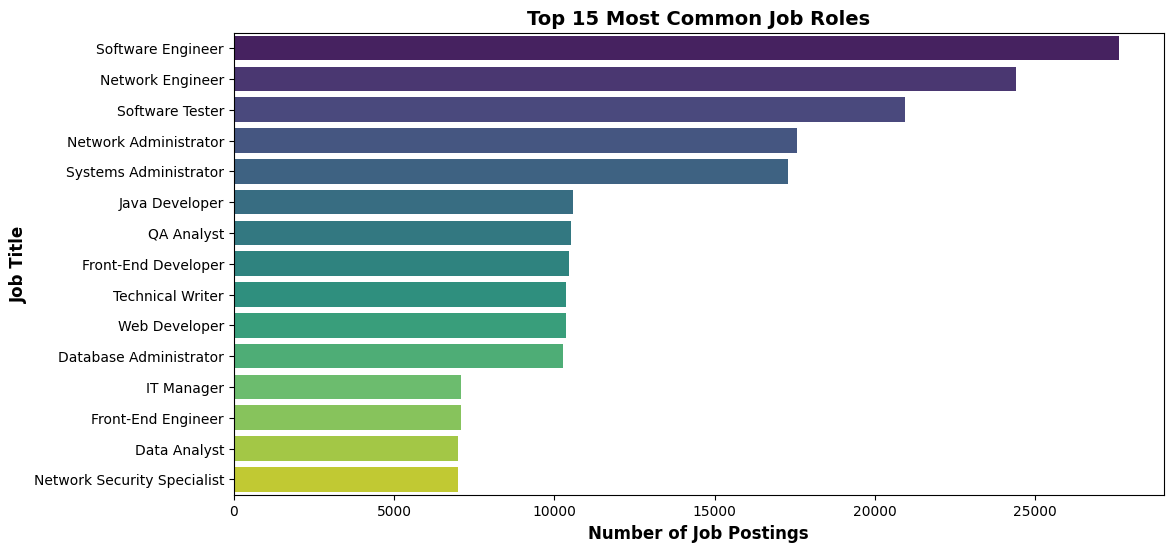

In [149]:
# Count occurrences of each job title
top_jobs = df['Job Title'].value_counts().nlargest(15)

# Define color palette
custom_palette = sns.color_palette("viridis", len(top_jobs))  # Accessible color scheme

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette=custom_palette)

# Labels and Title
plt.xlabel("Number of Job Postings", fontsize=12, fontweight='bold')
plt.ylabel("Job Title", fontsize=12, fontweight='bold')
plt.title("Top 15 Most Common Job Roles", fontsize=14, fontweight='bold')

# Improve readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

<Figure size 1400x800 with 0 Axes>

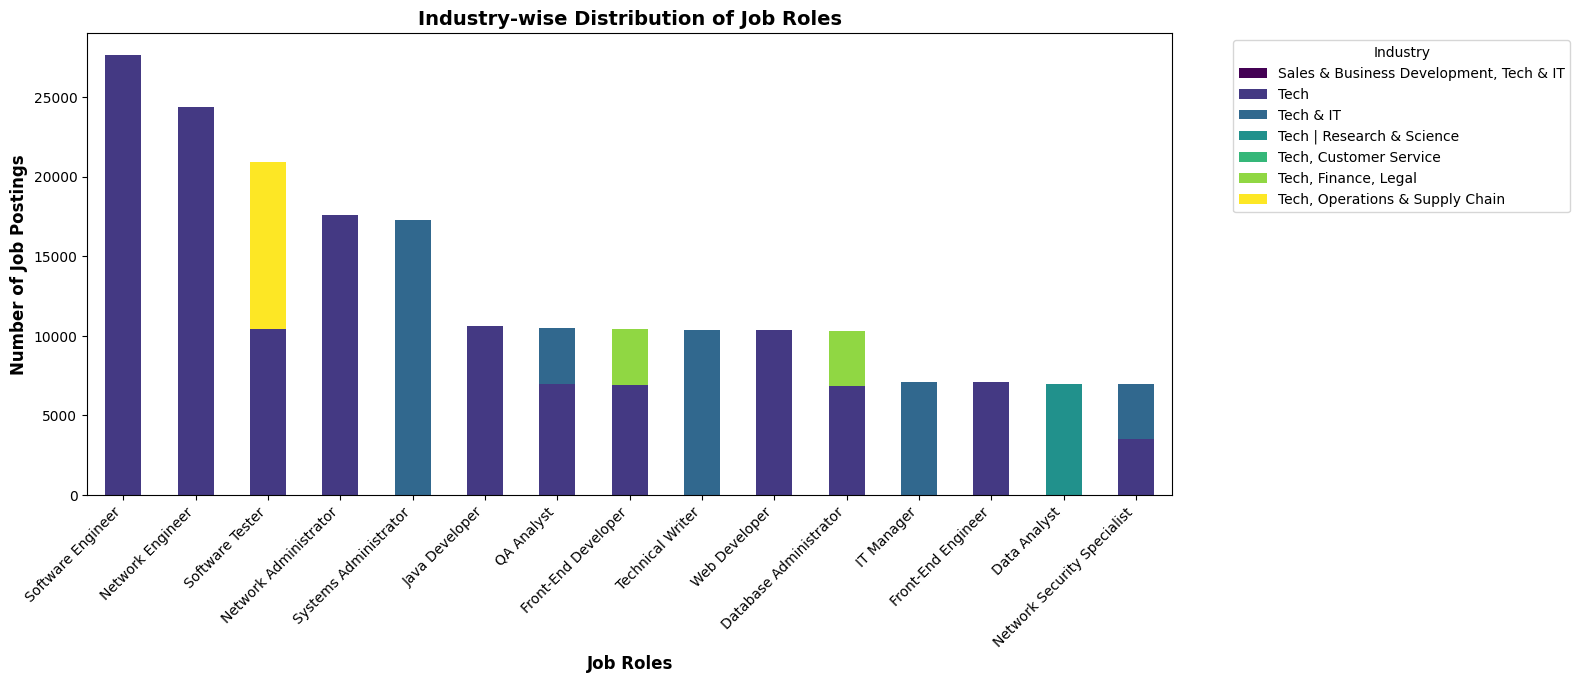

In [150]:
plt.figure(figsize=(14, 8))
industry_roles = df.groupby("Industry")["Job Title"].value_counts().unstack().fillna(0)
industry_roles[top_jobs.index].T.plot(kind='bar', stacked=True, figsize=(14, 6), colormap="viridis")

plt.xlabel("Job Roles", fontsize=12, fontweight='bold')
plt.ylabel("Number of Job Postings", fontsize=12, fontweight='bold')
plt.title("Industry-wise Distribution of Job Roles", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


<Figure size 1200x600 with 0 Axes>

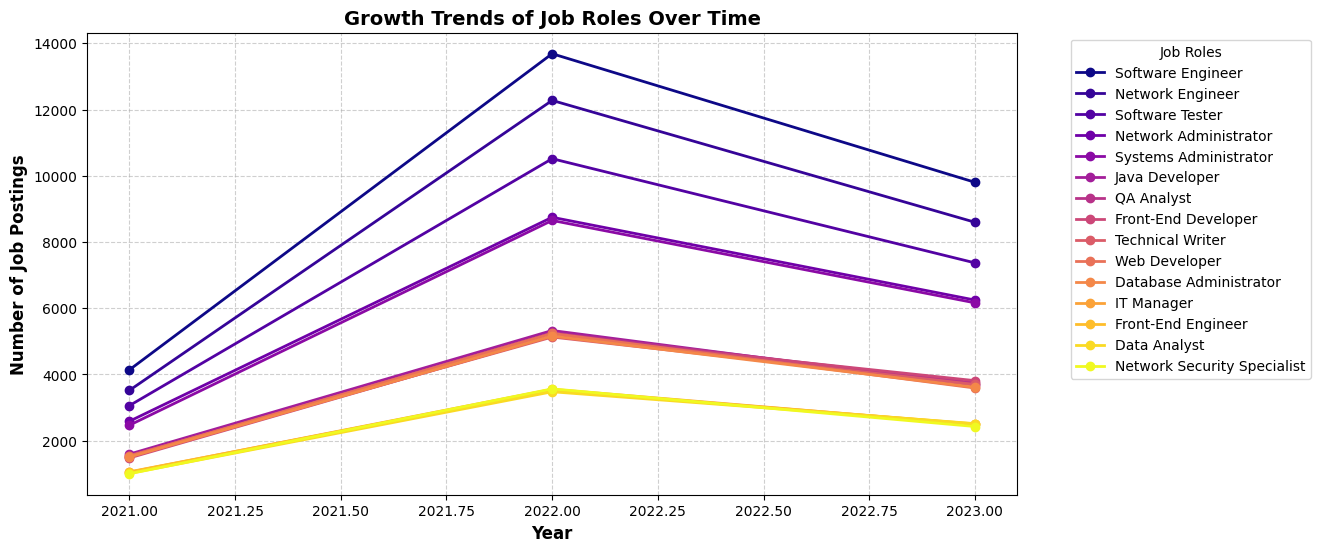

In [151]:
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'])
df['Year'] = df['Job Posting Date'].dt.year

role_trends = df.groupby(["Year", "Job Title"]).size().unstack().fillna(0)
top_role_trends = role_trends[top_jobs.index]

plt.figure(figsize=(12, 6))
top_role_trends.plot(kind='line', marker='o', colormap="plasma", linewidth=2, figsize=(12, 6))

plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Number of Job Postings", fontsize=12, fontweight='bold')
plt.title("Growth Trends of Job Roles Over Time", fontsize=14, fontweight='bold')

plt.legend(title="Job Roles", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


#  2.Skills Demand Analysis

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



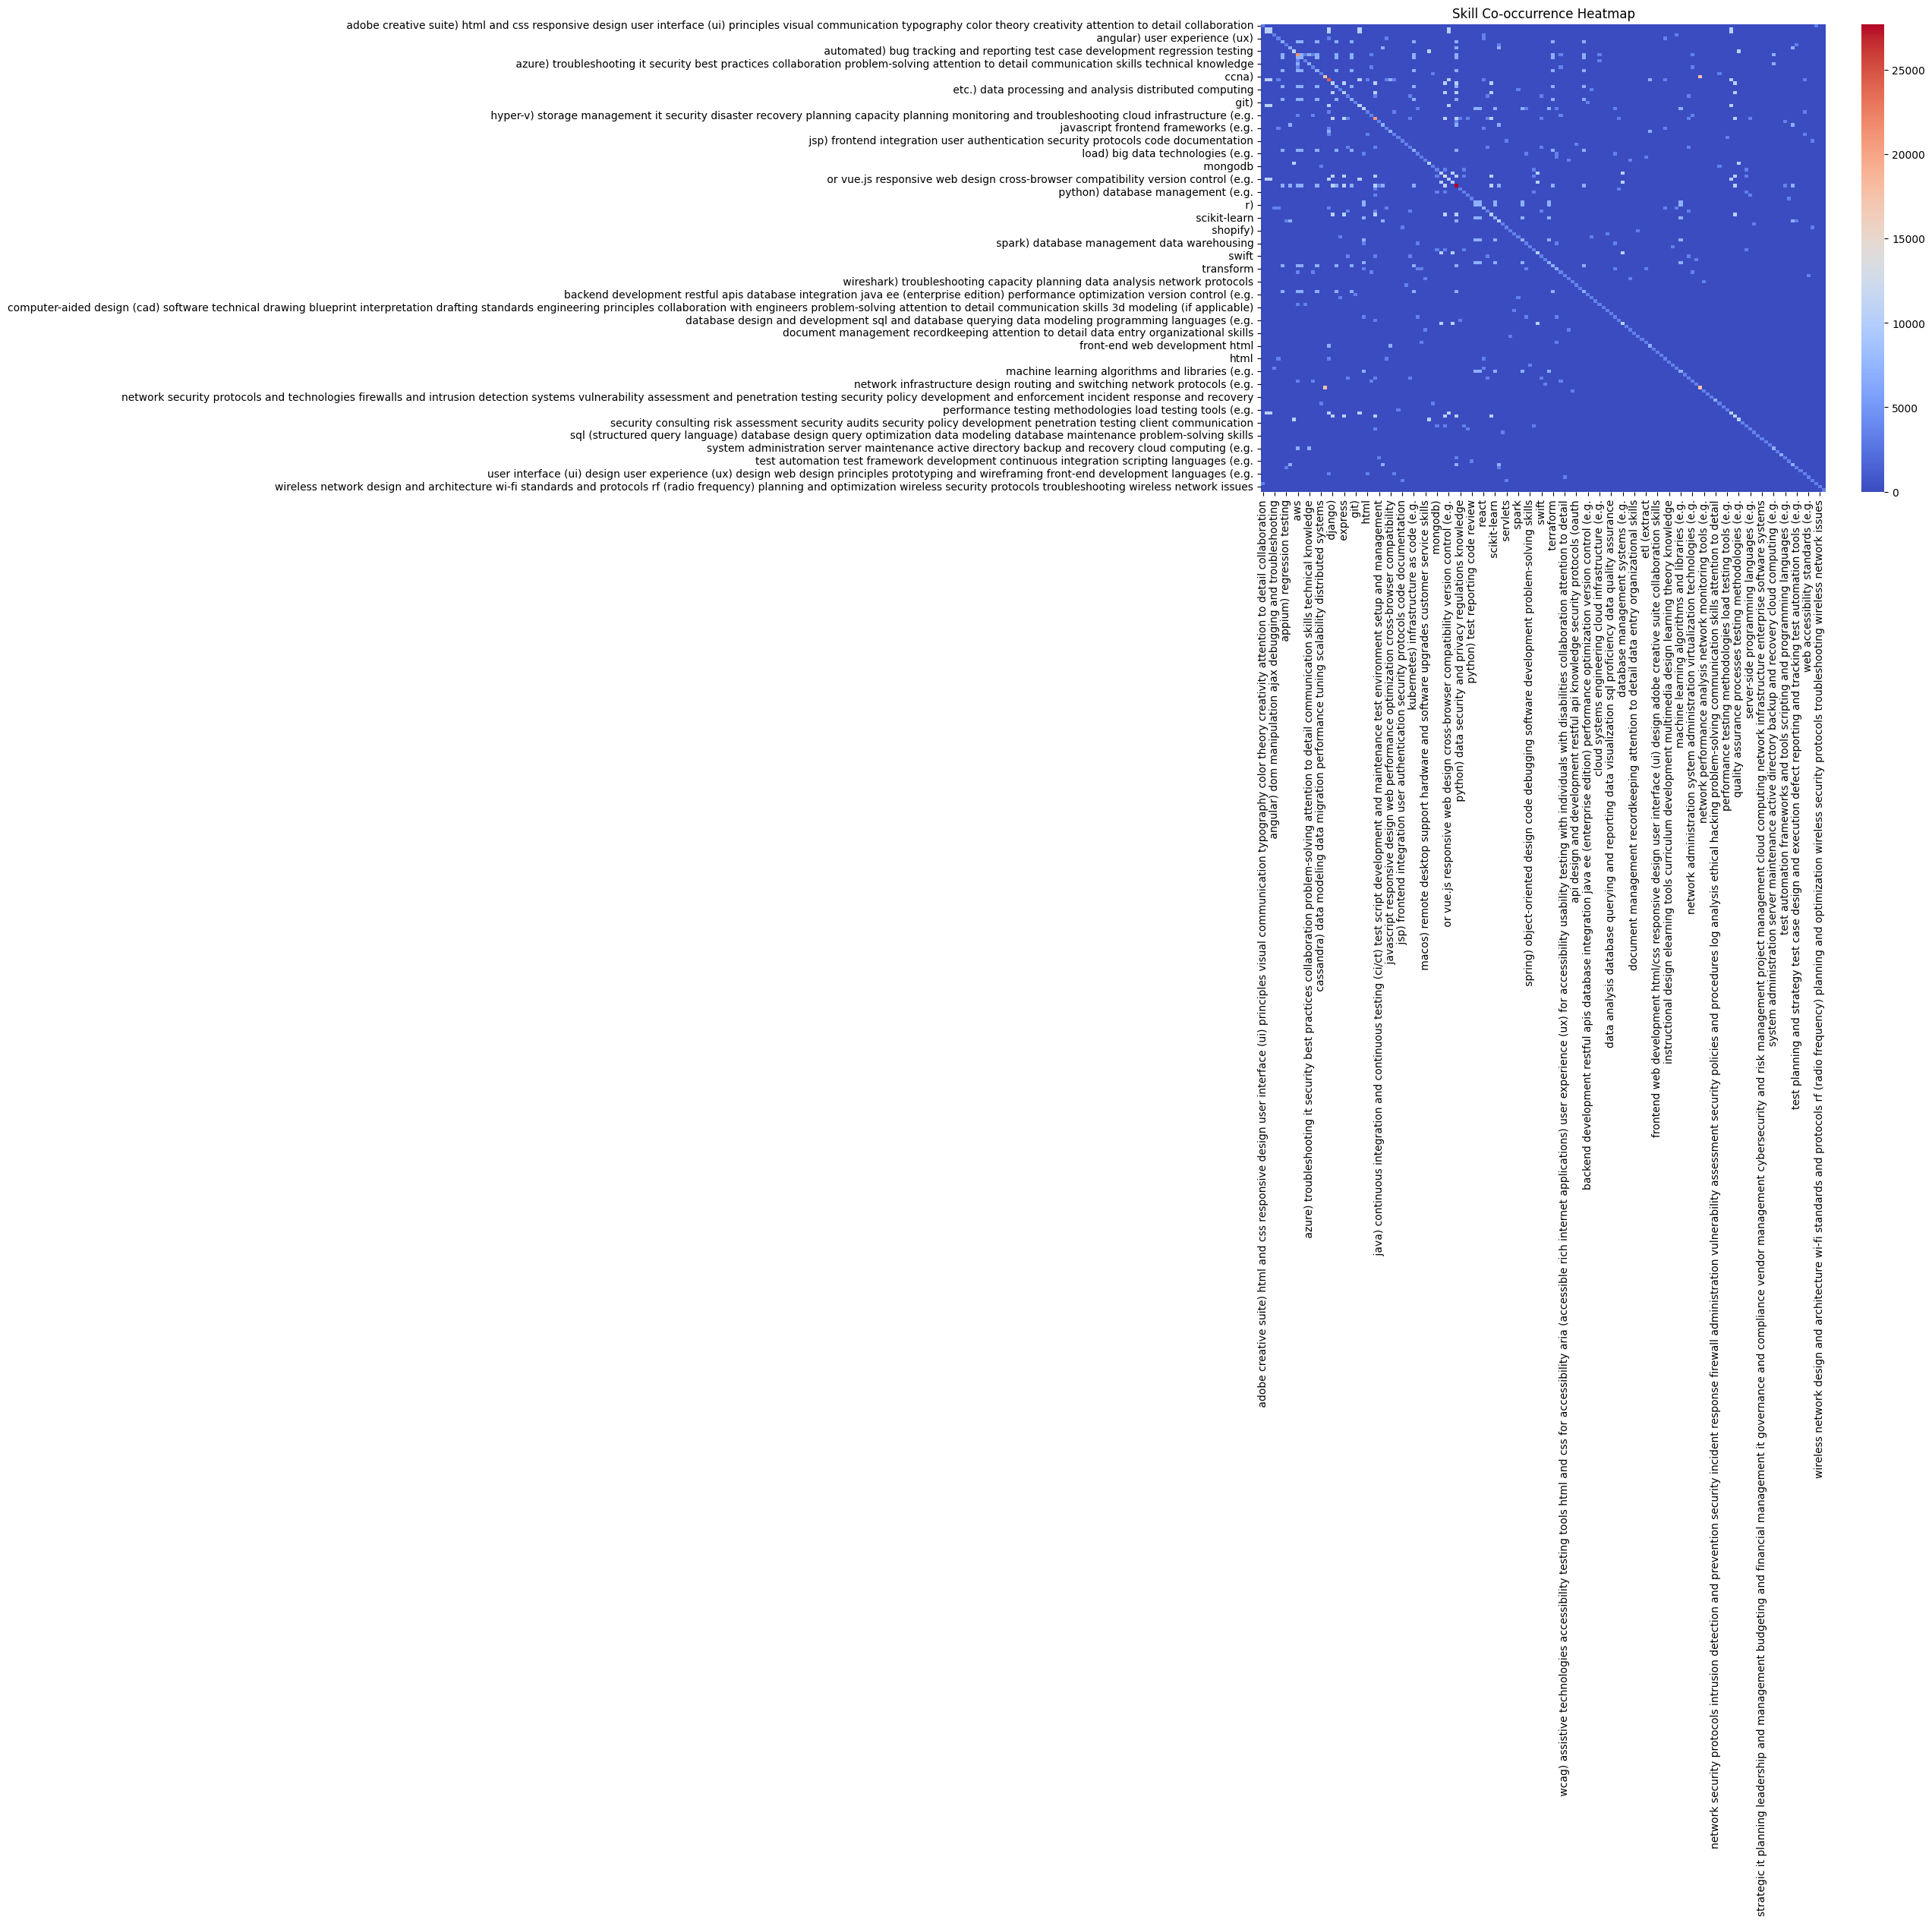

In [152]:
from sklearn.feature_extraction.text import CountVectorizer
from itertools import combinations

# Extract skills and create co-occurrence matrix
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(","))
X = vectorizer.fit_transform(df["skills"].dropna())
co_matrix = (X.T * X)

# Convert to DataFrame
co_matrix_df = pd.DataFrame(co_matrix.toarray(), index=vectorizer.get_feature_names_out(), columns=vectorizer.get_feature_names_out())

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(co_matrix_df, cmap="coolwarm", annot=False)
plt.title("Skill Co-occurrence Heatmap")
plt.show()


<ipython-input-153-3396303dcda6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




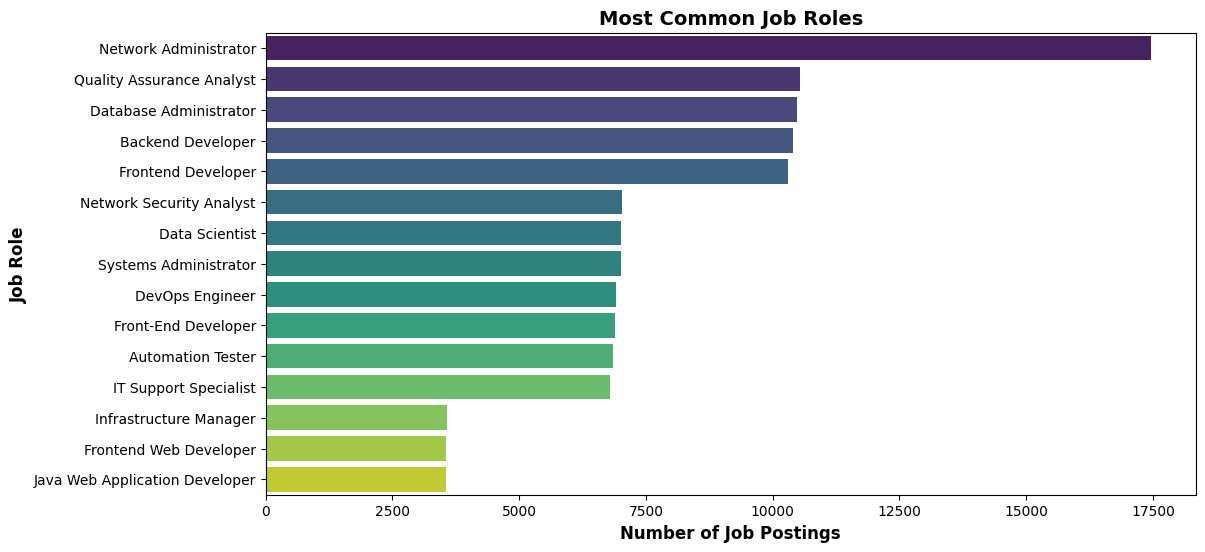

In [153]:
plt.figure(figsize=(12, 6))
top_roles = df["Role"].value_counts().head(15)
sns.barplot(x=top_roles.values, y=top_roles.index, palette="viridis")
plt.xlabel("Number of Job Postings", fontsize=12, fontweight='bold')
plt.ylabel("Job Role", fontsize=12, fontweight='bold')
plt.title("Most Common Job Roles", fontsize=14, fontweight='bold')
plt.show()


<ipython-input-154-b3d3069c7b5e>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-154-b3d3069c7b5e>:7: UserWarning:


The palette list has fewer values (15) than needed (20) and will cycle, which may produce an uninterpretable plot.



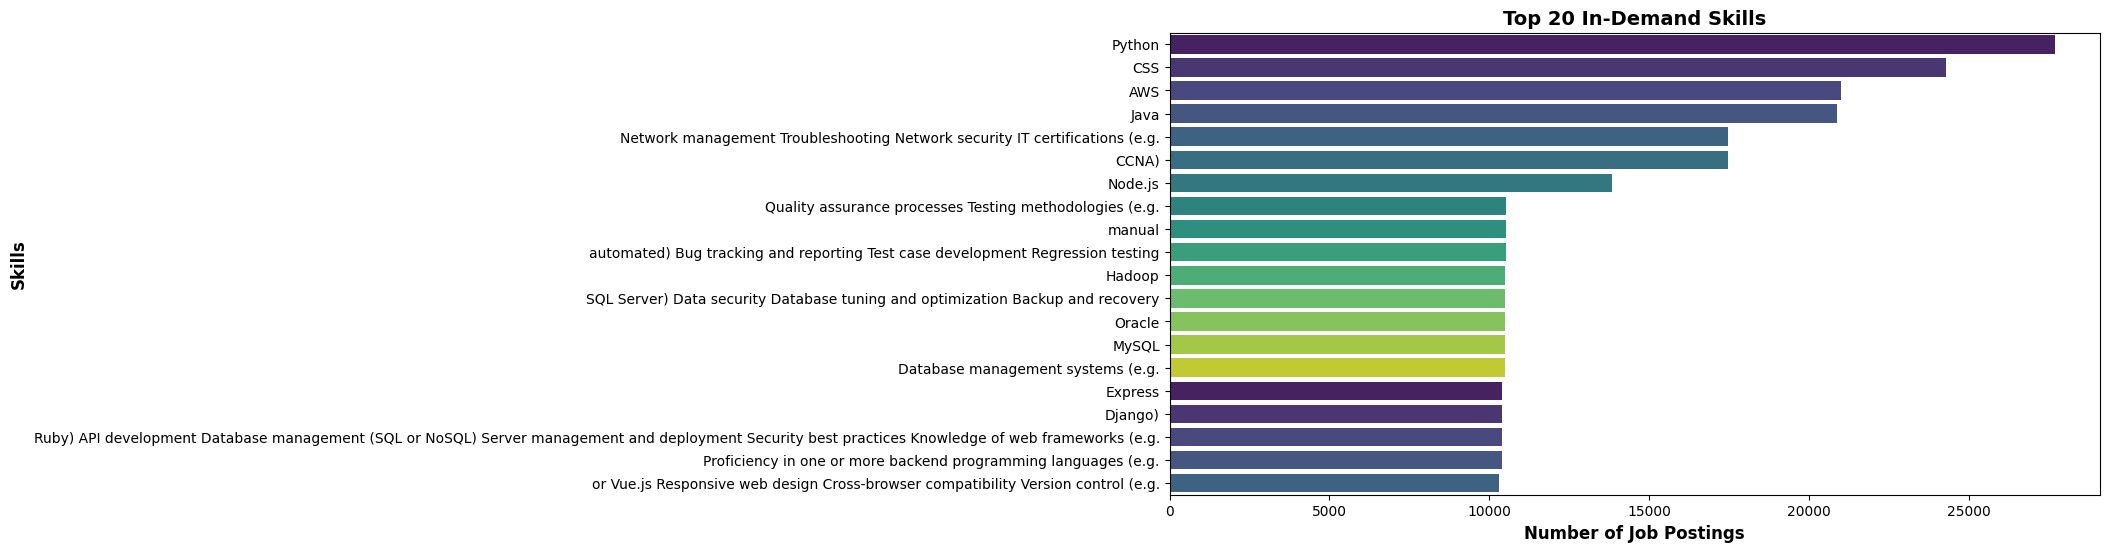

In [154]:
from collections import Counter

skills_list = df['skills'].dropna().str.split(',').explode().str.strip()
top_skills = pd.Series(Counter(skills_list)).sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills.values, y=top_skills.index, palette=custom_palette)

plt.xlabel("Number of Job Postings", fontsize=12, fontweight='bold')
plt.ylabel("Skills", fontsize=12, fontweight='bold')
plt.title("Top 20 In-Demand Skills", fontsize=14, fontweight='bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


<ipython-input-155-5337321c1f14>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-155-5337321c1f14>:15: UserWarning:


The palette list has fewer values (15) than needed (20) and will cycle, which may produce an uninterpretable plot.



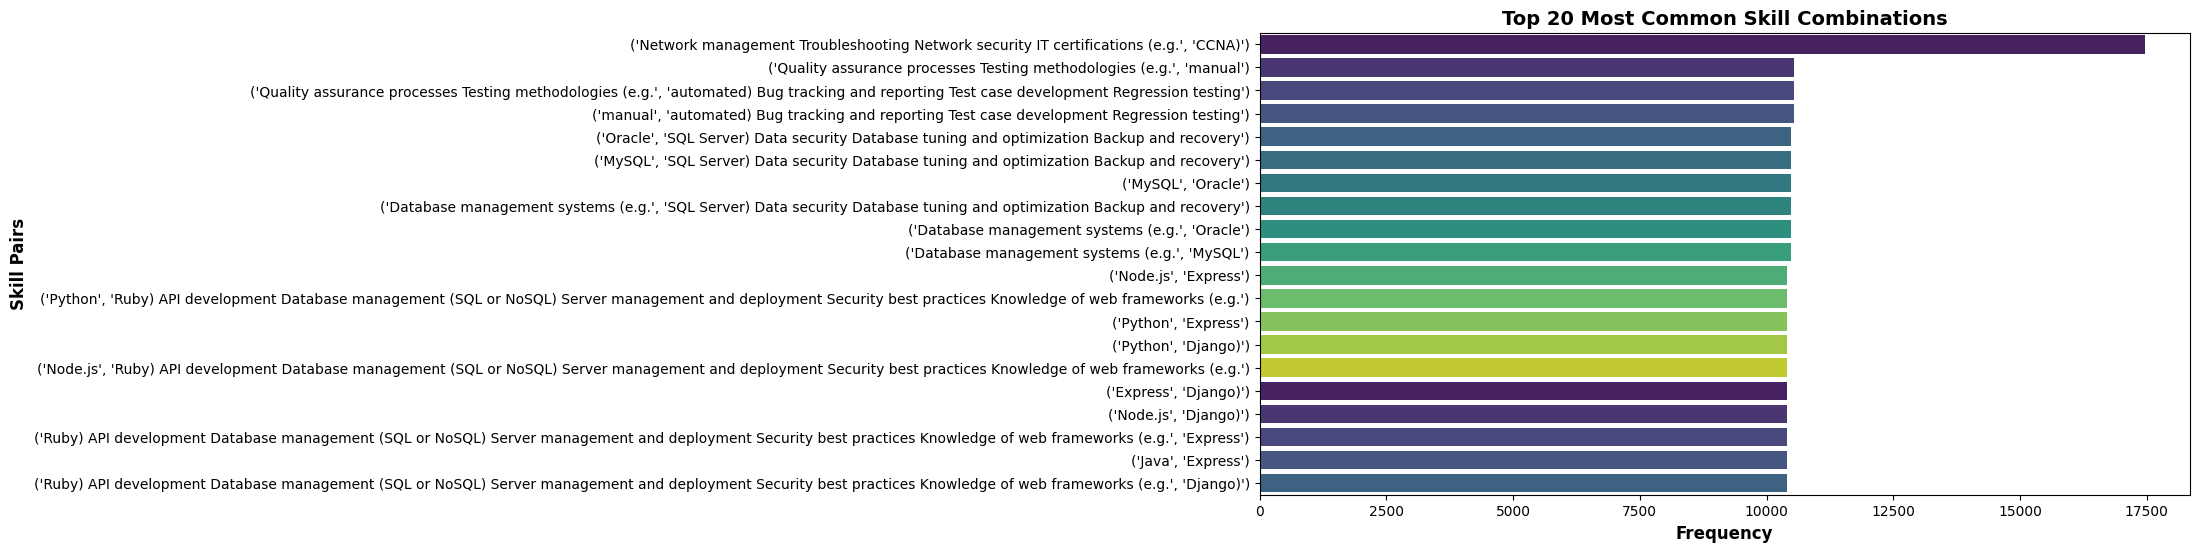

In [155]:
from itertools import combinations
from collections import defaultdict

skill_pairs = defaultdict(int)

for skills in df['skills'].dropna().str.split(','):
    skills = [s.strip() for s in skills if s.strip()]
    for pair in combinations(skills, 2):
        skill_pairs[pair] += 1

skill_pairs_df = pd.DataFrame(skill_pairs.items(), columns=["Skill Pair", "Frequency"])
skill_pairs_df = skill_pairs_df.sort_values(by="Frequency", ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=skill_pairs_df["Frequency"], y=skill_pairs_df["Skill Pair"].astype(str), palette=custom_palette)

plt.xlabel("Frequency", fontsize=12, fontweight='bold')
plt.ylabel("Skill Pairs", fontsize=12, fontweight='bold')
plt.title("Top 20 Most Common Skill Combinations", fontsize=14, fontweight='bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


<ipython-input-156-e184cfd78927>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-156-e184cfd78927>:5: UserWarning:


The palette list has fewer values (15) than needed (20) and will cycle, which may produce an uninterpretable plot.



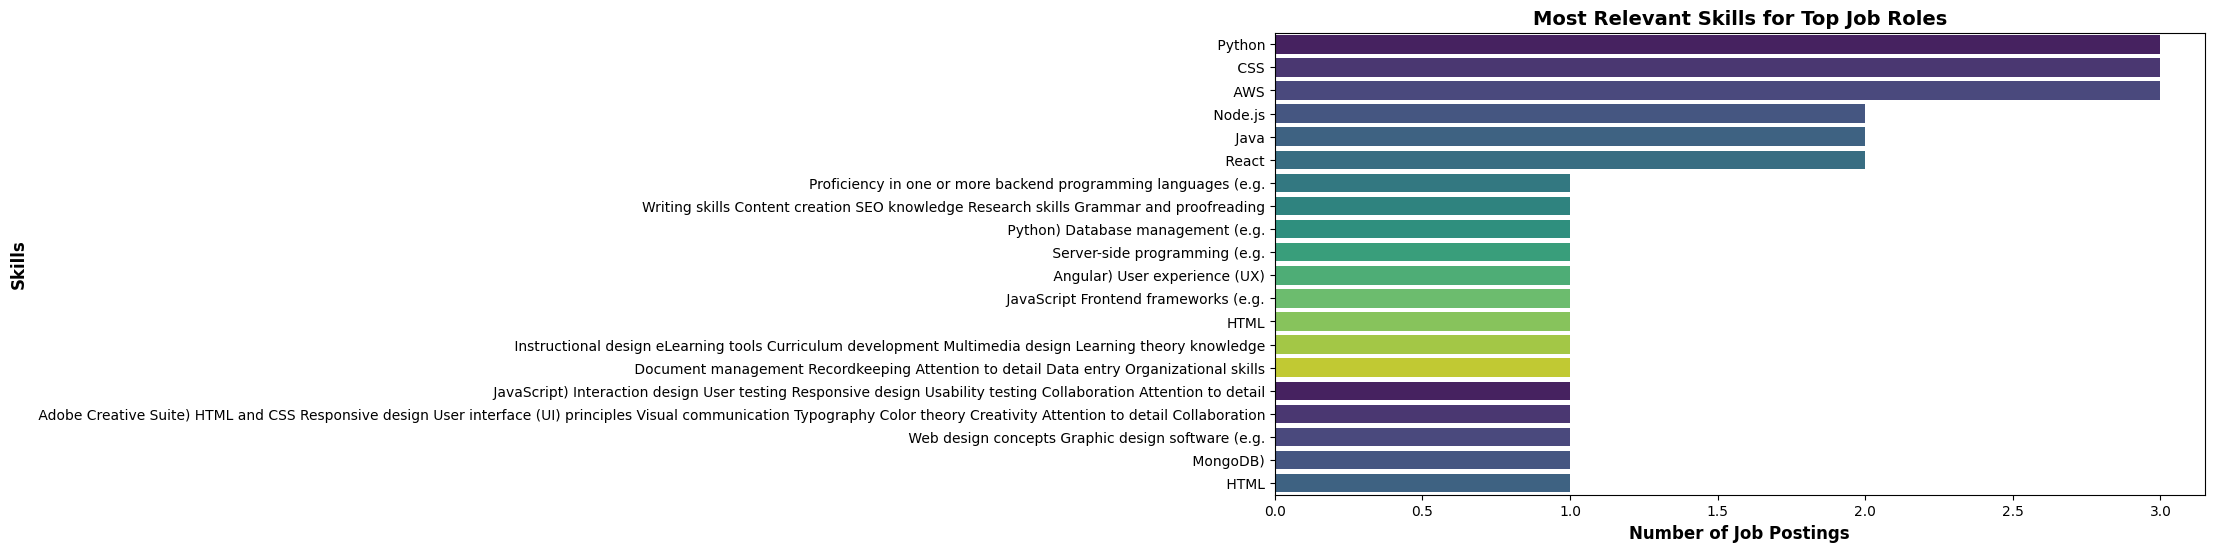

In [156]:
skill_job_mapping = df.groupby("Job Title")["skills"].apply(lambda x: ', '.join(x.dropna().unique()))
top_roles_skills = skill_job_mapping[top_jobs.index].str.split(',').explode().value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_roles_skills.values, y=top_roles_skills.index, palette=custom_palette)

plt.xlabel("Number of Job Postings", fontsize=12, fontweight='bold')
plt.ylabel("Skills", fontsize=12, fontweight='bold')
plt.title("Most Relevant Skills for Top Job Roles", fontsize=14, fontweight='bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


# 3.Salary Ranges & Career Progression

In [157]:
df["Salary_Lower"] = df["Salary Range"].str.extract(r'(\d+)').astype(float)


In [158]:
# Remove '$' and 'K' for numerical conversion
df[['Salary_Min', 'Salary_Max']] = df['Salary Range'].str.extract(r'\$(\d+)K-\$(\d+)K').astype(float)

# Convert to actual salary values
df['Salary_Min'] = df['Salary_Min'] * 1000
df['Salary_Max'] = df['Salary_Max'] * 1000

# Compute the average salary
df['Salary_Avg'] = (df['Salary_Min'] + df['Salary_Max']) / 2


In [159]:
# Create a violin plot for salary distribution
fig = px.violin(
    df,
    y='Salary_Avg',
    box=True,
    title="Salary Range Distribution in Tech Jobs",
    color_discrete_sequence=['#1f77b4'],  # Deep Blue
)

# Layout adjustments
fig.update_layout(
    yaxis_title="Average Salary",
    template="plotly_dark",
    height=500
)

fig.show()


In [160]:
# Create a violin plot for salary distribution
fig = px.violin(
    df,
    y='Salary_Avg',
    color='Industry',
    box=True,
    title="Salary Range Distribution in Tech Jobs",
    color_discrete_sequence=['#1f77b4'],  # Deep Blue
)

# Layout adjustments
fig.update_layout(
    yaxis_title="Average Salary",
    template="plotly_dark",
    height=500
)

fig.show()


In [161]:
import pandas as pd
import re

# Function to calculate experience level based on range midpoint
def categorize_experience(exp_range):
    # Extract numbers from the range (e.g., '2 to 12 Years' -> [2, 12])
    numbers = list(map(int, re.findall(r'\d+', exp_range)))

    # If we have both lower and upper bounds, calculate midpoint
    if len(numbers) == 2:
        midpoint = (numbers[0] + numbers[1]) / 2
    elif len(numbers) == 1:
        midpoint = numbers[0]  # If only one number, use it directly
    else:
        return "Unknown"  # Catch any unexpected values

    # Assign to categories based on midpoint
    if midpoint <= 2:
        return "Entry-Level"
    elif 2 < midpoint <= 4:
        return "Junior"
    elif 4 < midpoint <= 7:
        return "Mid-Level"
    elif 7 < midpoint <= 10:
        return "Senior"
    else:
        return "Executive"

# Apply function to create new column
df['Experience Level'] = df['Experience'].apply(categorize_experience)

# Display counts for verification
print(df['Experience Level'].value_counts())


Experience Level
Mid-Level    158062
Senior       128020
Junior         6085
Name: count, dtype: int64


In [162]:
import plotly.express as px

# Count the number of job postings for each experience level
exp_counts = df['Experience Level'].value_counts().reset_index()
exp_counts.columns = ['Experience Level', 'Job Postings']

# Create an interactive bar chart
fig = px.bar(
    exp_counts,
    x='Experience Level',
    y='Job Postings',
    title='Job Postings by Experience Level',
    text='Job Postings',
    color_discrete_sequence=['#1f77b4']  # Lighter blue
)

# Update layout for black background
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),  # Ensure text is visible on black
    xaxis=dict(title='Experience Level', showgrid=False),
    yaxis=dict(title='Number of Job Postings', showgrid=False),
    title_x=0.5  # Center the title
)

# Show the chart
fig.show()


In [163]:
import plotly.express as px

# Convert Job Posting Date to datetime format if not already
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'])

# Aggregate job postings by month
df_time_series = df.resample('M', on='Job Posting Date').size().reset_index(name='Job Postings')

# Create an interactive line chart
fig = px.line(df_time_series,
              x='Job Posting Date',
              y='Job Postings',
              title="Tech Job Postings Over Time",
              labels={'Job Posting Date': 'Date', 'Job Postings': 'Number of Job Postings'},
              color_discrete_sequence=['#1f77b4'])

# Update layout for better visibility
fig.update_layout(xaxis_title="Date",
                  yaxis_title="Number of Job Postings",
                  plot_bgcolor="white",
                  hovermode="x")

# Show figure
fig.show()


<ipython-input-163-b37cc63c8766>:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



# Preprocessing

In [164]:
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [165]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [166]:
# Load spaCy's English model for Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning:

[W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu



In [167]:
# Initialize lemmatizer & stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


# 1.Standard NLP Preprocessing Steps

In [168]:
text_columns = ["Job Title","skills", "Qualifications"]

In [169]:
#Standard NLP Preprocessing Function
def preprocess_text(text):
    if pd.isnull(text):  # Handle missing values just in case
        return ""

In [170]:
# Convert to lowercase for each column in the text_columns list
for column in text_columns:
    df[column] = df[column].str.lower()

df[text_columns].head()


Job Title                                             skills  \
0          web developer  html, css, javascript frontend frameworks (e.g...   
1       network engineer  wireless network design and architecture wi-fi...   
2        software tester  quality assurance processes testing methodolog...   
3             qa analyst  performance testing load testing stress testin...   
4  network administrator  network security protocols intrusion detection...   

  Qualifications  
0            bca  
1            phd  
2            mca  
3            bca  
4          b.com

In [171]:
# Remove special characters, punctuation, and extra spaces
for columns in text_columns:
  df[column] = df[column].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

df[text_columns].head()


Job Title                                             skills  \
0          web developer  html, css, javascript frontend frameworks (e.g...   
1       network engineer  wireless network design and architecture wi-fi...   
2        software tester  quality assurance processes testing methodolog...   
3             qa analyst  performance testing load testing stress testin...   
4  network administrator  network security protocols intrusion detection...   

  Qualifications  
0            bca  
1            phd  
2            mca  
3            bca  
4           bcom

In [172]:
# # Tokenization function
# def spacy_tokenizer(text):
#     # Process the text with spaCy to tokenize
#     doc = nlp(text)
#     return [token.text for token in doc]

# # Apply tokenization to each of the specified columns
# for column in text_columns:
#     df[column] = df[column].apply(spacy_tokenizer)

# # Check the result
# df[text_columns].head()

In [173]:
# Tokenization using spaCy
def spacy_tokenizer(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]


In [174]:
# Remove stopwords
for column in text_columns:
    df[column] = df[column].apply(lambda x: [word for word in x if word not in stop_words])

In [175]:
# Lemmatization
for column in text_columns:
    df[column] = df[column].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [176]:
# Rejoin words into a single string
#return" ".join(tokens)

# 2.N.E.R

In [178]:
def extract_ner(texts):
    entities_list = []

    # Process texts in batches using nlp.pipe()
    for doc in nlp.pipe(texts, batch_size=50, n_process=2):
        entities = [ent.text for ent in doc.ents]
        entities_list.append(entities)

    return entities_list

# Apply to the "Job Description" column
df["Extracted_NER"] = extract_ner(df["Job Description"])


## 3.Vectorization

In [179]:
!pip install gensim


In [180]:
from gensim.models import Word2Vec
from tqdm import tqdm

In [181]:
# Define Word2Vec model file path
word2vec_path = "word2vec_model.model"

In [183]:
# Collect all tokenized words from all text columns
sentences = df[text_columns].values.tolist()

In [184]:
# Flatten nested lists into a single list of sentences
sentences = [word for sublist in sentences for word in sublist]


In [185]:
 # Train Word2Vec
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4, sg=1, negative=5)

In [186]:
 # Save the model
word2vec_model.save(word2vec_path)
print("Word2Vec model saved successfully.")

Word2Vec model saved successfully.


In [187]:
# Function to get the average word embedding for a text column
def get_average_embedding(words):
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)  # Handle empty cases

# Apply embedding transformation
for column in text_columns:
    df[column + "_embedding"] = df[column].apply(get_average_embedding)

## Cosine similarity

In [202]:
!python -m spacy download en_core_web_lg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 935.5 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [192]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Function to get word embeddings for a text
def get_average_embedding(text, model):
    if isinstance(text, list):  # Ensure it's a list
        vectors = [model.wv[word] for word in text if word in model.wv]
        if vectors:
            return np.mean(vectors, axis=0)  # Take the average
    return np.zeros(model.vector_size)  # Return zeros if no valid words

# Apply embedding function to user and job profiles
df["user_embedding"] = df["user_profile"].apply(lambda x: get_average_embedding(x, word2vec_model))
df["job_embedding"] = df["job_profile"].apply(lambda x: get_average_embedding(x, word2vec_model))


In [193]:
# Compute cosine similarity between user and job embeddings
df["cosine_similarity"] = df.apply(lambda row: cosine_similarity([row["user_embedding"]], [row["job_embedding"]])[0][0], axis=1)


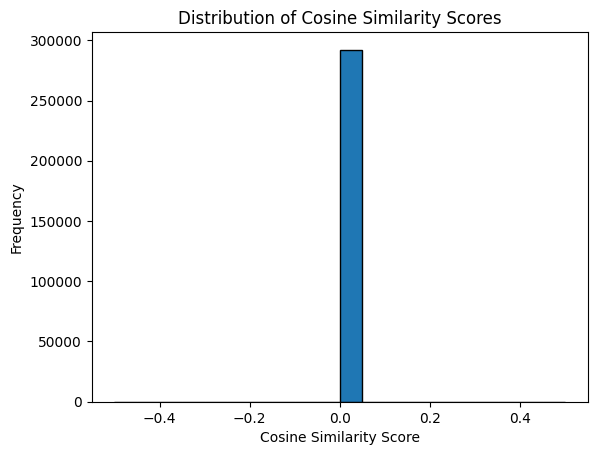

In [194]:
import matplotlib.pyplot as plt

plt.hist(df["cosine_similarity"], bins=20, edgecolor="black")
plt.xlabel("Cosine Similarity Score")
plt.ylabel("Frequency")
plt.title("Distribution of Cosine Similarity Scores")
plt.show()


In [195]:
print(df[["user_embedding", "job_embedding"]].head(5))


                                      user_embedding  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                       job_embedding  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  


In [196]:
import numpy as np

print(np.array(df["user_embedding"].iloc[0]).shape)
print(np.array(df["job_embedding"].iloc[0]).shape)


(100,)
(100,)


In [197]:
from sklearn.metrics.pairwise import cosine_similarity

print(cosine_similarity([df["user_embedding"].iloc[0]], [df["job_embedding"].iloc[0]]))


[[0.]]


In [198]:
print(np.linalg.norm(df["user_embedding"].iloc[0]))
print(np.linalg.norm(df["job_embedding"].iloc[0]))


0.0
0.0


In [ ]:
# Save model for later use
word2vec_model.save("word2vec_model.model")

# To reload in future
# from gensim.models import Word2Vec
# word2vec_model = Word2Vec.load("word2vec_model.model")


In [ ]:
# Save processed DataFrame
df.to_csv("preprocessed_data.csv", index=False)

# 4.Feature Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
encoder = LabelEncoder()

In [ ]:
df["Industry_Encoded"] = encoder.fit_transform(df["Industry"])

In [ ]:
# Define the mapping for experience levels
experience_mapping = {
    'Junior': 1,
    'Mid-Level': 2,
    'Senior': 3
}

# Apply the mapping to create a new encoded column
df['Experience Level Encoded'] = df['Experience Level'].map(experience_mapping)

# Check if encoding worked
df[['Experience Level', 'Experience Level Encoded']].head()


In [ ]:
#Encode Role column

In [ ]:
# Frequency encoding for 'Country'
country_counts = df['Country'].value_counts().to_dict()
df['Country_Freq'] = df['Country'].map(country_counts)

# Drop the original 'Country'
df.drop(columns=['Country'], inplace=True)



In [ ]:
# One-Hot Encode Work Type
df = pd.get_dummies(df, columns=['Work Type'], prefix='WorkType', dtype=int, drop_first=True)


# 5.Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the 'Company Size' column
df['Company Size Scaled'] = scaler.fit_transform(df[['Company Size']])

# Drop the original unscaled column
df.drop(columns=['Company Size'], inplace=True)

df.info()
